In [1]:
# Bank Marketing Practice

## Import Libraries

In [130]:
# One need to import the libraries to perform the project

import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od 

import pandas as pd
# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,jaccard_score

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from lime.lime_tabular import LimeTabularExplainer

In [3]:
# Here I use the kaggle dataset about bank marketing data
od.download('https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading bank-marketing.zip to .\bank-marketing


100%|██████████| 393k/393k [00:00<00:00, 1.41MB/s]

In [6]:
# Then read the dataset with pandas
bank_marketing = pd.read_csv('../PortfolioCAHL/bank-marketing/bank-additional-full.csv', sep=';')



In [7]:
bank_marketing.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
bank_marketing.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
bank_marketing.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
# Here I print the unique values by each variable in dataset
columns = bank_marketing.columns

for i in columns:
    print("Unique Values in Column {}: '\n\n' ".format(i), bank_marketing[i].unique(),"\n")

Unique Values in Column age: '

'  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

Unique Values in Column job: '

'  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Unique Values in Column marital: '

'  ['married' 'single' 'divorced' 'unknown'] 

Unique Values in Column education: '

'  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Unique Values in Column default: '

'  ['no' 'unknown' 'yes'] 

Unique Values in Column housing: '

'  ['no' 'yes' 'unknown'] 

Unique Values in Column loan: '

'  ['no' 'yes' 'unknown'] 

Unique Values in Column contact: '

'  ['telephone' 'cellular'] 

Unique Values in Column month: '

'  ['ma

In [13]:
# Here I Split the information into numerical and categorial variables for further analysis

numerical_features = bank_marketing.select_dtypes(include=['int64', 'float64']).columns
categorical_features = bank_marketing.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('y')

print("Numerical columns: ", numerical_features)
print("Categorical columns: ", categorical_features)

Numerical columns:  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical columns:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


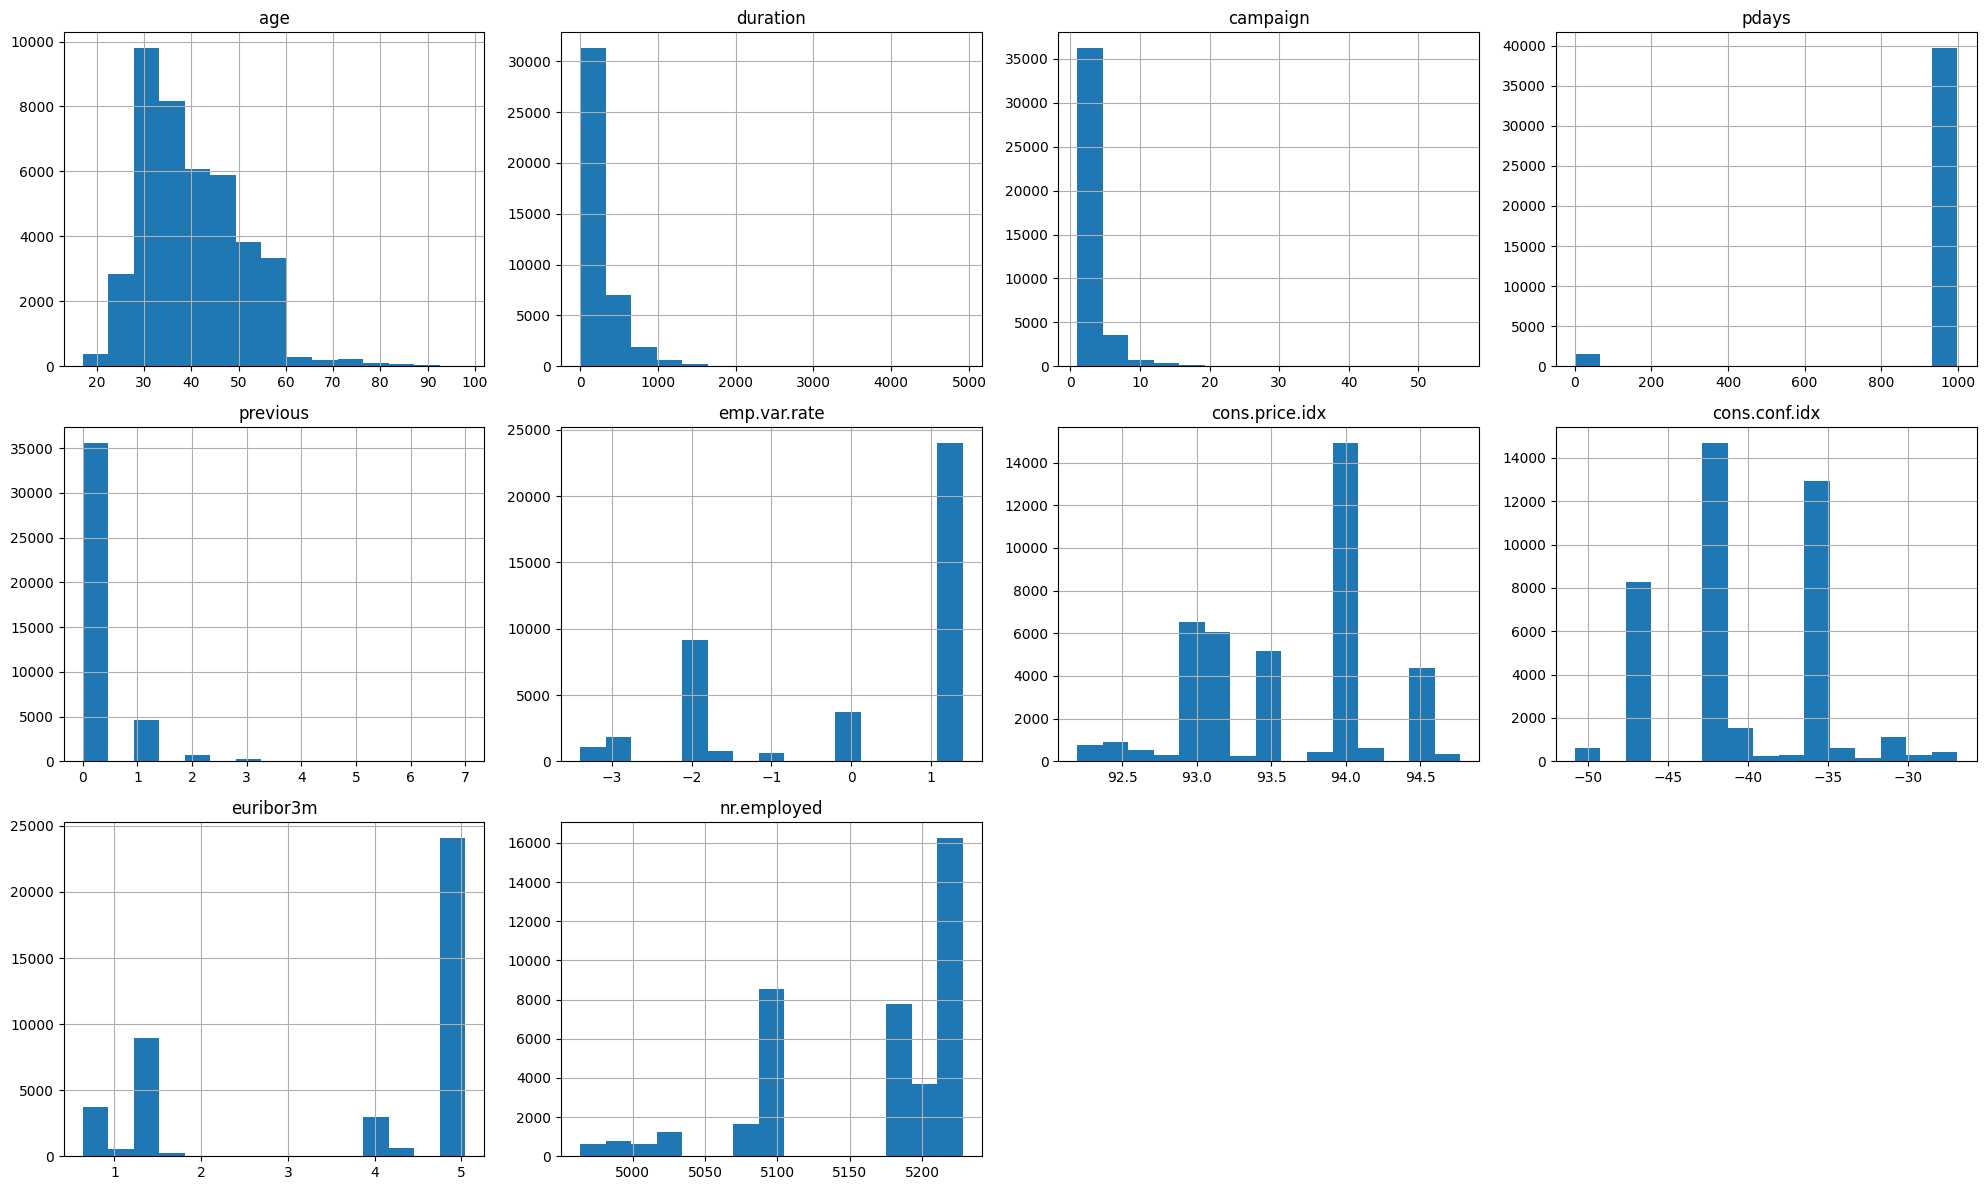

In [14]:
# Plot the numerical variables into histogram

num_rows = int(len(numerical_features) / 4) + (len(numerical_features) % 4 > 0)
bank_marketing[numerical_features].hist(bins=15, figsize=(20, num_rows * 4), layout=(num_rows, 4))
plt.tight_layout()
plt.show()

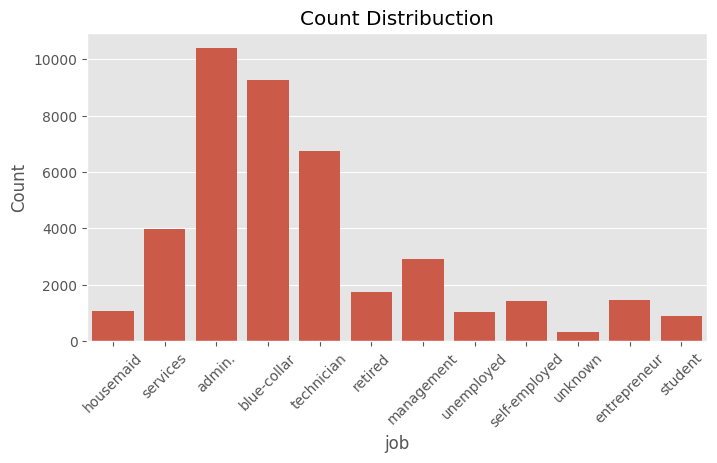

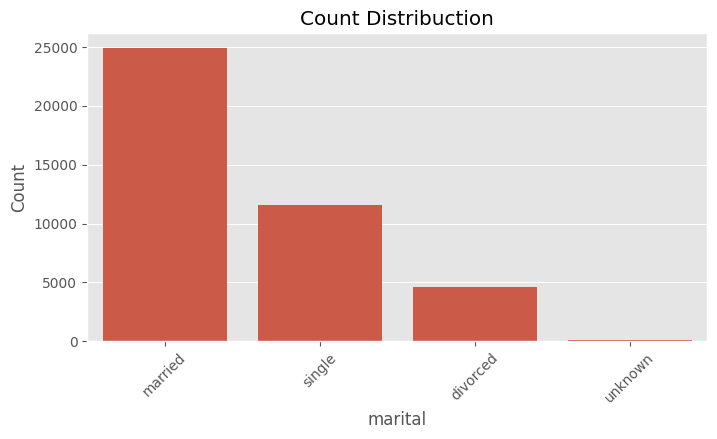

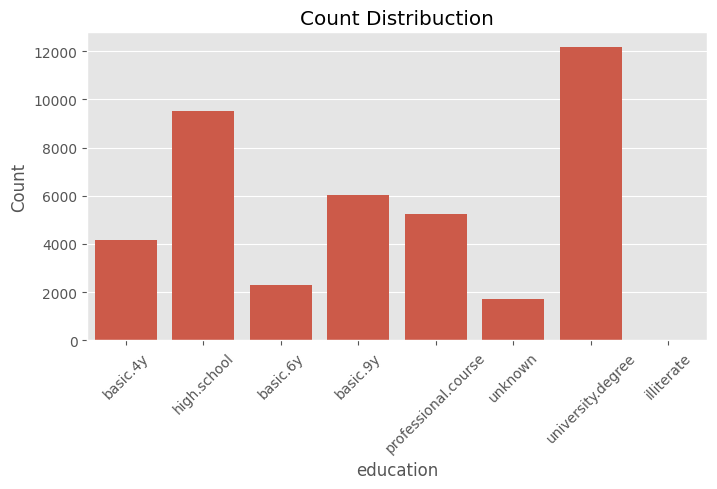

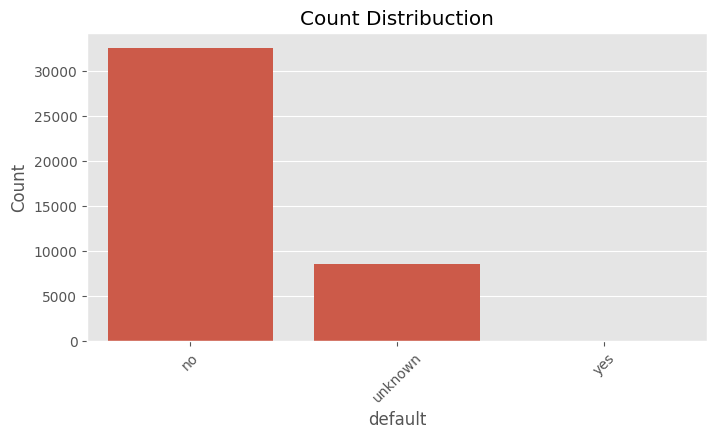

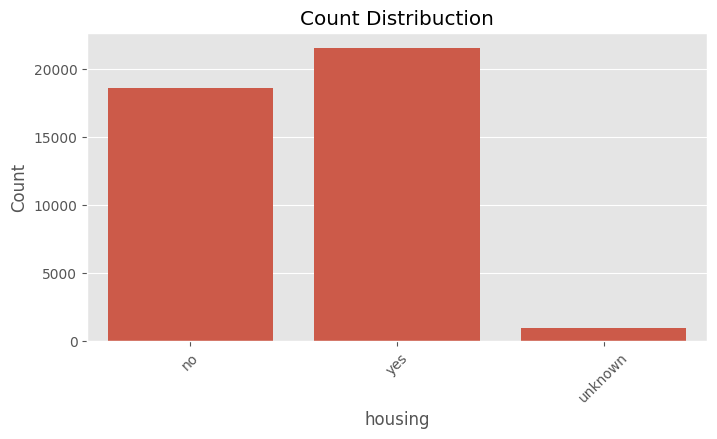

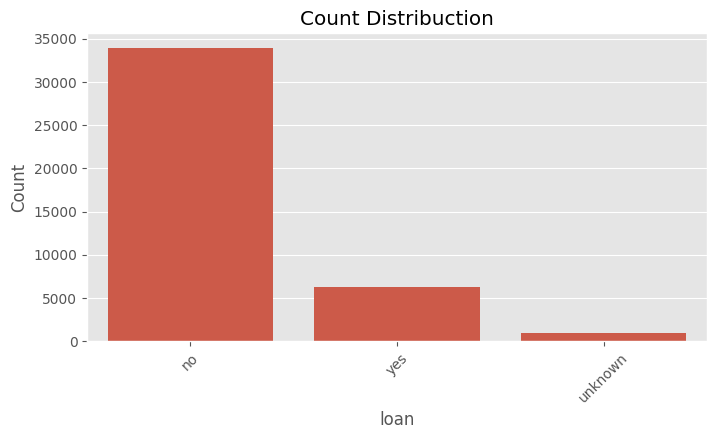

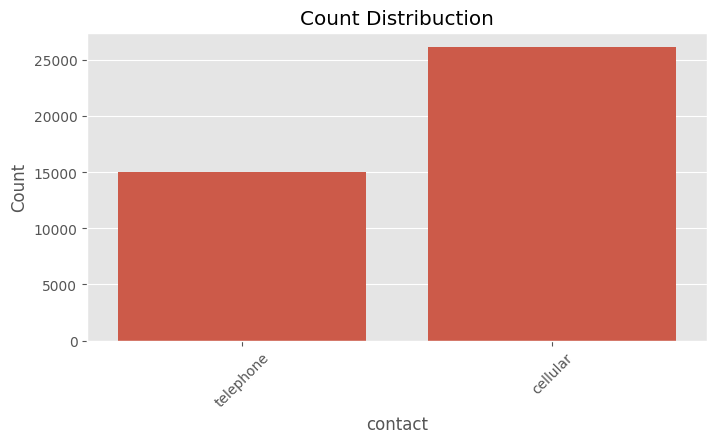

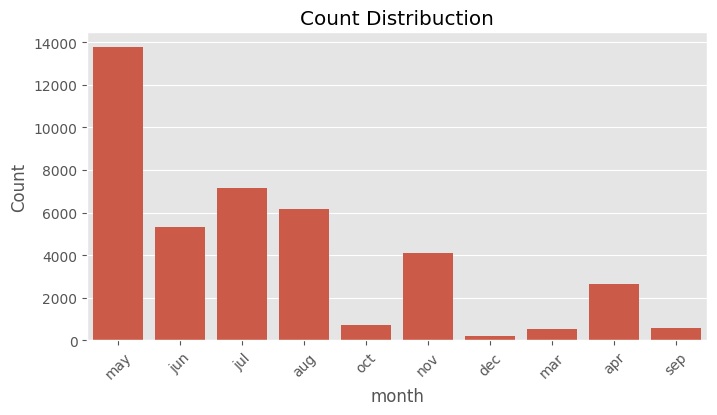

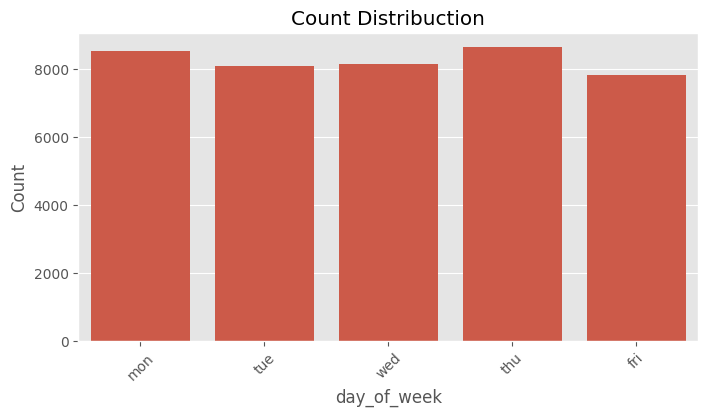

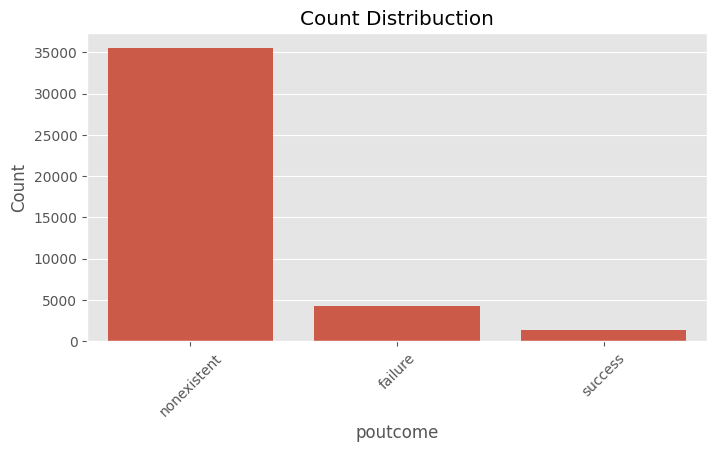

In [15]:
# Plot categorial variables inot countplots
plt.style.use('ggplot')

for i in categorical_features:
    plt.figure(figsize=(8,4))
    
    sns.countplot(x=i,data=bank_marketing)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Count Distribuction')
    plt.xticks(rotation=45)
    
    plt.show()
    

In [16]:
bank_marketing['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

<Axes: >

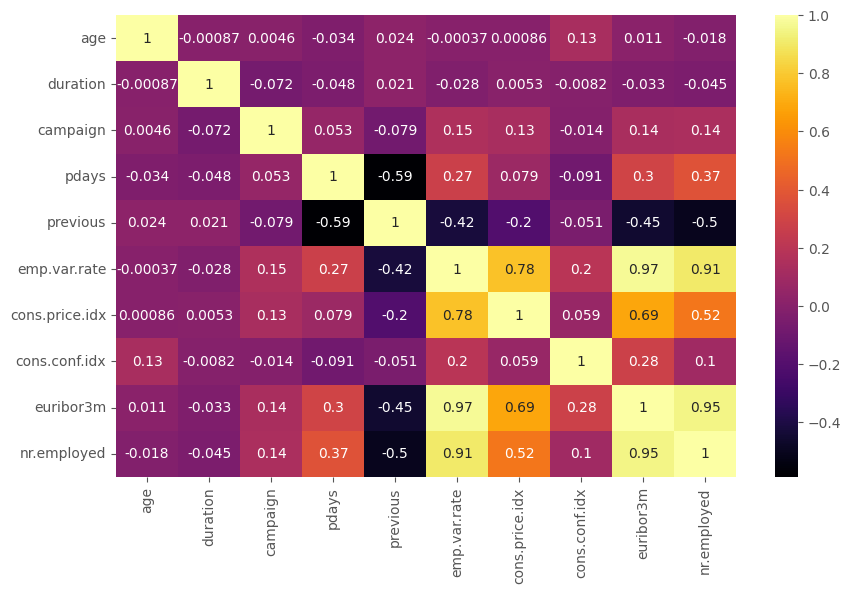

In [17]:
# Plot the correlation information from the numerical variables in a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(bank_marketing[numerical_features].corr(), annot=True, cmap='inferno')

In [18]:
# For further analysis I split the independent variables from the dependent variables

Y = bank_marketing['y'].map({"yes":1,"no":0}).values
print("Values from Y variable: ",Y)
X = bank_marketing.drop('y', axis=1)
print("Columns in X: ", X.columns)

Values from Y variable:  [0 0 0 ... 0 1 0]
Columns in X:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [19]:
# Here I apply a One Hot Encoder to categorical variables and pass through the numerical values

preprocessor = ColumnTransformer([("numerical","passthrough", numerical_features), 
                                ("categorical",OneHotEncoder(sparse=False,handle_unknown="ignore"), 
                                 categorical_features)])
preprocessor

ColumnTransformer(transformers=[('numerical', 'passthrough',
                                 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])

## Creating a model training pipelines

In [106]:
#Logistic Regression
lr_model = Pipeline([("preprocessor", preprocessor),("model", LogisticRegression(class_weight="balanced",solver="liblinear",random_state=42))])

#Decision Tree
dt_model = Pipeline([("preprocessor",preprocessor),("model",DecisionTreeClassifier(class_weight="balanced"))])

#Random Forest
rf_model = Pipeline([("preprocessor",preprocessor),("model",RandomForestClassifier(class_weight="balanced",n_estimators=100, n_jobs=1))])

#XGBoost
xgb_model = Pipeline([("preprocessor",preprocessor),("model",XGBClassifier(scale_pos_weight=(1-Y.mean()),n_jobs=-1))])

## Spliting the data

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=42)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (28831, 20) (28831,)
Test set: (12357, 20) (12357,)


## LogRegression

In [71]:
gs_lr = GridSearchCV(lr_model,{"model__C":[1,1.3,1.5]},n_jobs=-1,cv=5,scoring="accuracy")

gs_lr.fit(X_train,Y_train)

C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         'passthrough',
                                                                         Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                                       ('model',
                                        LogisticRegression(C=1.5,
                                                           class_weight='balanced',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1, param_grid={'model__C': [1, 1.3, 1.5]},
             scoring='accuracy')

In [72]:
print(gs_lr.best_params_)
print(gs_lr.best_score_)

{'model__C': 1.5}
0.8594220372217182


In [73]:
lr_model.set_params(**gs_lr.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=1.5, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [74]:
lr_model.get_params("model")

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical', 'passthrough',
                                    Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
         dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
          'month', 'day_of_week', 'poutcome'],
         dtype='object'))])),
  ('model',
   LogisticRegression(C=1.5, class_weight='balanced', random_state=42,
                      solver='liblinear'))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('numerical', 'passthrough',
                                  Index(['age', 'duration', 'campaign',

In [75]:
lr_model.fit(X_train,Y_train)

C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=1.5, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [76]:
Y_pred_lr = lr_model.predict(X_test)

In [77]:
accuracy_score(Y_test,Y_pred_lr)

0.8616978230962208

In [78]:
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10965
           1       0.44      0.90      0.59      1392

    accuracy                           0.86     12357
   macro avg       0.71      0.88      0.76     12357
weighted avg       0.92      0.86      0.88     12357



Here we get the contribution of each feature to the predicting process

In [101]:
# Get the coefficients
coefficients = lr_model.named_steps["model"].coef_

# Get the features names
feature_names = lr_model.named_steps["preprocessor"].get_feature_names_out()

# Create a dictionary
coefficients_dict = dict(zip(feature_names, coefficients.flatten()))

df_coefficients_lr = pd.DataFrame(list(coefficients_dict.items()), columns=['Feature', 'Coefficient'])

print(df_coefficients_lr.max())
print(df_coefficients_lr.min())

df_coefficients_lr.sort_values(by=['Coefficient'], ascending=False, inplace=True)

df_coefficients_lr.head()

Feature        numerical__previous
Coefficient               1.591451
dtype: object
Feature        categorical__contact_cellular
Coefficient                        -1.674886
dtype: object


,Feature,Coefficient
50,categorical__month_mar,1.591451
8,numerical__euribor3m,1.296563
6,numerical__cons.price.idx,0.832129
46,categorical__month_aug,0.821631
15,categorical__job_retired,0.447190


## Decision Tree

In [80]:
gs_dt = GridSearchCV(dt_model,{"model__max_depth":[3,5,7], 
                            "model__min_samples_split":[2,5]},
                  n_jobs=-1,cv=5,scoring="f1_weighted")

gs_dt.fit(X_train,Y_train)

C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         'passthrough',
                                                                         Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               max_depth=7,
                                                               min_samples_split=5))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 7],
                         'model__min_samples_split': [2, 5]},
             scoring='f1_weighted')

In [81]:
print(gs_dt.best_params_)
print(gs_dt.best_score_)

{'model__max_depth': 7, 'model__min_samples_split': 2}
0.8716081880662081


In [82]:
dt_model.set_params(**gs_dt.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=7))])

In [83]:
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)
accuracy_score(Y_test,Y_pred_dt)

C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8474548838714898

In [84]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10965
           1       0.42      0.91      0.57      1392

    accuracy                           0.85     12357
   macro avg       0.70      0.87      0.74     12357
weighted avg       0.92      0.85      0.87     12357



In [105]:
# Access to the model inside the pipeline
dt_model_inner = dt_model.named_steps["model"]

# Define important features of the model 
feature_importances = dt_model_inner.feature_importances_

# Obtain the features names
feature_names_dt = dt_model.named_steps["preprocessor"].get_feature_names_out()

# Create a Dataframe with Feature and Importance of each variable
df_feature_importances_dt = pd.DataFrame({"Feature": feature_names_dt, "Importance": feature_importances})

print(df_feature_importances_dt.max())
print(df_feature_importances_dt.min())

df_feature_importances_dt.sort_values(by=['Importance'], ascending=False, inplace=True)

df_feature_importances_dt.head(5)

Feature       numerical__previous
Importance               0.543032
dtype: object
Feature       categorical__contact_cellular
Importance                              0.0
dtype: object


,Feature,Importance
1,numerical__duration,0.543032
9,numerical__nr.employed,0.272861
8,numerical__euribor3m,0.079277
7,numerical__cons.conf.idx,0.042798
53,categorical__month_oct,0.019734


## Random Forest

In [87]:
gs_rf = GridSearchCV(rf_model,{"model__max_depth":[10,15],
                               "model__min_samples_split":[5,10]},
                     n_jobs=-1,cv=5,scoring="f1_weighted")

gs_rf.fit(X_train,Y_train)

C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         'passthrough',
                                                                         Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=1))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15],
                         'model__min_samples_split': [5, 10]},
             scoring='f1_weighted')

In [88]:
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'model__max_depth': 15, 'model__min_samples_split': 5}
0.9044939881489935


In [89]:
rf_model.set_params(**gs_rf.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_split=5, n_jobs=1))])

In [90]:
rf_model.fit(X_train,Y_train)


C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_split=5, n_jobs=1))])

In [91]:
Y_predict_rf = rf_model.predict(X_test)

In [92]:
accuracy_score(Y_test,Y_predict_rf)

0.8960103585012543

In [113]:
print(classification_report(Y_test, Y_predict_rf))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     10965
           1       0.52      0.84      0.64      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.87      0.79     12357
weighted avg       0.93      0.90      0.91     12357



In [102]:
rf_model_inner = rf_model.named_steps["model"]
feature_importances_rf = rf_model_inner.feature_importances_

# Obtiene los nombres de las características
feature_names_rf = rf_model.named_steps["preprocessor"].get_feature_names_out()

# Crea un DataFrame con la importancia de las características
df_feature_importances_rf = pd.DataFrame({"Feature": feature_names_rf, "Importance": feature_importances_rf})

df_feature_importances_rf.sort_values(by=['Importance'], ascending=False, inplace=True)

df_feature_importances_rf.head()


,Feature,Importance
1,numerical__duration,0.410143
8,numerical__euribor3m,0.090277
9,numerical__nr.employed,0.070919
5,numerical__emp.var.rate,0.059711
7,numerical__cons.conf.idx,0.039907


## XGB Model

In [107]:
gs_xgb = GridSearchCV(xgb_model, {"model__max_depth": [5, 10], "model__min_child_weight": [5, 10], "model__n_estimators": [25]}, n_jobs=-1, cv=5, scoring="f1_weighted")

gs_xgb.fit(X_train, Y_train)


C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         'passthrough',
                                                                         Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['job', 'mari...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10],
                         'model__min_child_weight': [5, 10],
                         'model__n_estimators': [25]},
             scoring='f1_weighted')

In [108]:
print(gs_xgb.best_params_)
print(gs_xgb.best_score_)

{'model__max_depth': 5, 'model__min_child_weight': 5, 'model__n_estimators': 25}
0.9090712696424583


In [109]:
xgb_model.set_params(**gs_xgb.best_params_)
xgb_model.fit(X_train,Y_train)

C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=25, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

In [110]:
Y_predict_xgb = xgb_model.predict(X_test)

In [111]:
accuracy_score(Y_test,Y_predict_xgb)

0.9178603220846484

In [115]:
print(classification_report(Y_test, Y_predict_xgb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.69      0.50      0.58      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



## Report Classification

In [125]:
model_prediction = {"LogRegression":Y_pred_lr,"DecisionTree":Y_pred_dt,"RandomForest":Y_predict_rf,"XGBoost":Y_predict_xgb}

for model,pred in model_prediction.items():
    print(f"Model {model}:\n\n",classification_report(Y_test,pred))



Model LogRegression:

               precision    recall  f1-score   support

           0       0.99      0.86      0.92     10965
           1       0.44      0.90      0.59      1392

    accuracy                           0.86     12357
   macro avg       0.71      0.88      0.76     12357
weighted avg       0.92      0.86      0.88     12357

Model DecisionTree:

               precision    recall  f1-score   support

           0       0.99      0.84      0.91     10965
           1       0.42      0.91      0.57      1392

    accuracy                           0.85     12357
   macro avg       0.70      0.87      0.74     12357
weighted avg       0.92      0.85      0.87     12357

Model RandomForest:

               precision    recall  f1-score   support

           0       0.98      0.90      0.94     10965
           1       0.52      0.84      0.64      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.87      0.79     12357
weighte

## Confusion Matrix

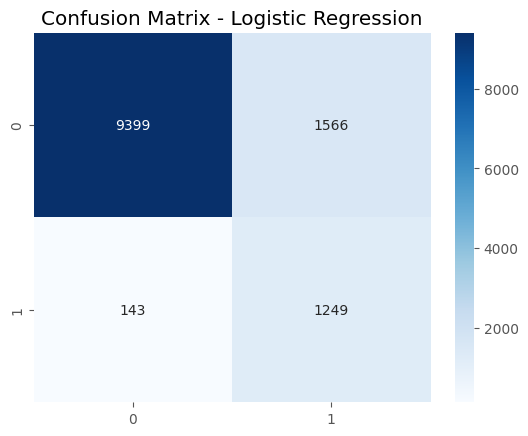

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10965
           1       0.44      0.90      0.59      1392

    accuracy                           0.86     12357
   macro avg       0.71      0.88      0.76     12357
weighted avg       0.92      0.86      0.88     12357

F1 Score:  0.88
jaccard Score: 0.42


In [133]:

# Model: Logistic Regression
cm_lr = confusion_matrix(Y_test, Y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("Classification Report - Logistic Regression:")
print(classification_report(Y_test, Y_pred_lr))

print("F1 Score: ",f1_score(Y_test, Y_pred_lr, average="weighted").round(2))
print("jaccard Score:", jaccard_score(Y_test, Y_pred_lr).round(2))


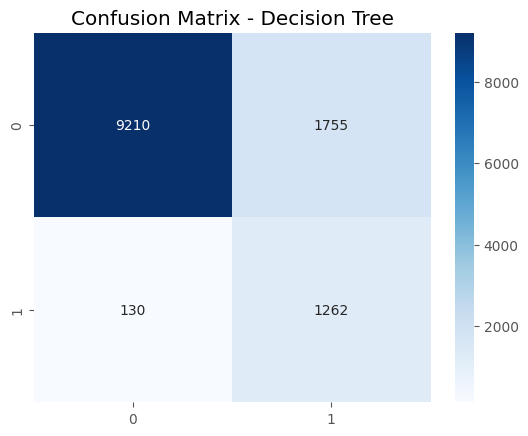

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10965
           1       0.42      0.91      0.57      1392

    accuracy                           0.85     12357
   macro avg       0.70      0.87      0.74     12357
weighted avg       0.92      0.85      0.87     12357

F1 Score:  0.87
jaccard Score: 0.4


In [134]:
# Model: Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

print("Classification Report - Decision Tree:")
print(classification_report(Y_test, Y_pred_dt))

print("F1 Score: ",f1_score(Y_test, Y_pred_dt, average="weighted").round(2))
print("jaccard Score:", jaccard_score(Y_test, Y_pred_dt).round(2))

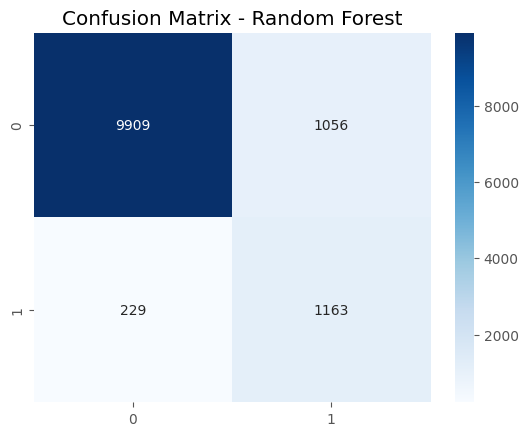

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     10965
           1       0.52      0.84      0.64      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.87      0.79     12357
weighted avg       0.93      0.90      0.91     12357

F1 Score:  0.91
jaccard Score: 0.48


In [135]:
# Model: Random Forest
cm_rf = confusion_matrix(Y_test, Y_predict_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("Classification Report - Random Forest:")
print(classification_report(Y_test, Y_predict_rf))

print("F1 Score: ",f1_score(Y_test, Y_predict_rf, average="weighted").round(2))
print("jaccard Score:", jaccard_score(Y_test, Y_predict_rf).round(2))

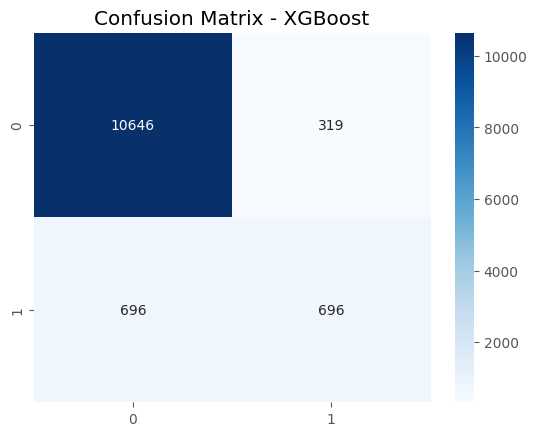

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.69      0.50      0.58      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357

F1 Score:  0.91
jaccard Score: 0.41


In [136]:
# Model: XGBoost
cm_xgb = confusion_matrix(Y_test, Y_predict_xgb)

sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()

print("Classification Report - XGBoost:")
print(classification_report(Y_test, Y_predict_xgb))

print("F1 Score: ",f1_score(Y_test, Y_predict_xgb, average="weighted").round(2))
print("jaccard Score:", jaccard_score(Y_test, Y_predict_xgb).round(2))